In [1]:
# !pip install -U -q imblearn
import os, types
import pandas as pd
# from botocore.client import Config
# import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

In [33]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b0526e14e5c849c0b938bf280dcd4db8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4sejyU41g9YKDYMV6UJ696q-UEAtdL6X4VI3A8KwZnJS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_b0526e14e5c849c0b938bf280dcd4db8.get_object(Bucket='heartdiseasedetection-donotdelete-pr-x9rghlscz98ju4',Key='heart_2020_cleaned.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

### Authenticating Google Drive and importing neccessary dataset

In [2]:
# data = pd.read_csv(body)
data = pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.info()
print("Dimensions of the data:", data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Extracting Numeric Data and doing EDA on the data



In [5]:
numeric_data = data._get_numeric_data()
scaler = StandardScaler()
scaler.fit(numeric_data)
numeric_data[numeric_data.columns] = scaler.transform(numeric_data)

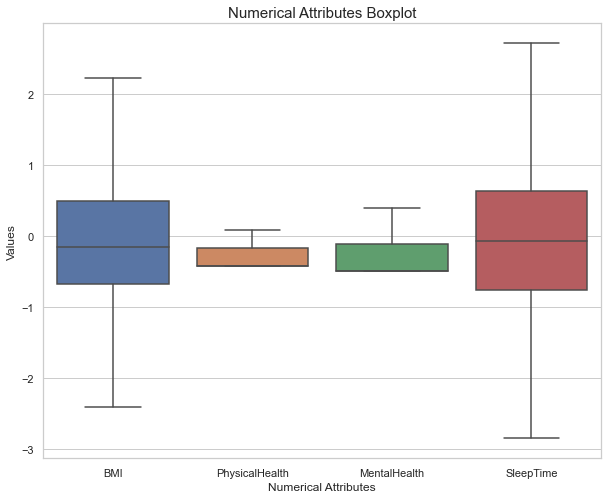

In [6]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=numeric_data, showfliers=False)  # outliers are ignore to be plotted
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

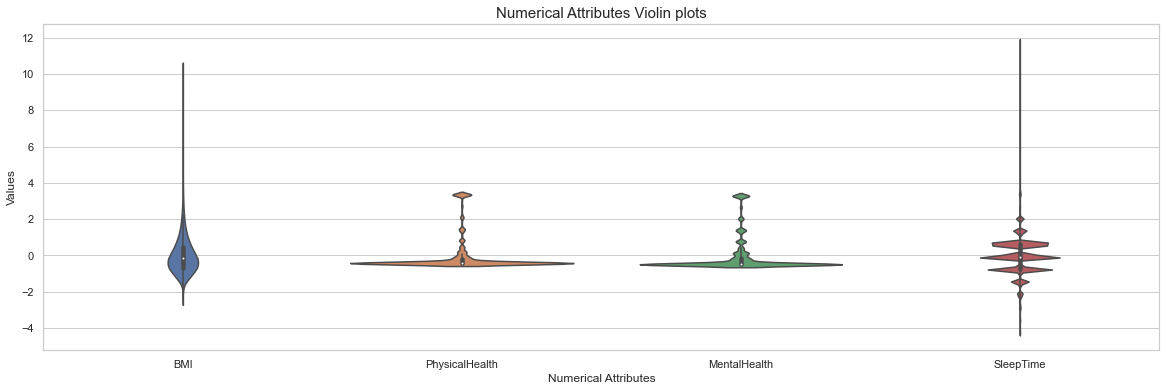

In [7]:
plt.figure(figsize=(20,6))
sns.set_theme(style="whitegrid")
sns.violinplot(data=numeric_data)
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Violin plots", fontsize= 15)
plt.show()

In [8]:
numeric_data = numeric_data.join(data['HeartDisease'])

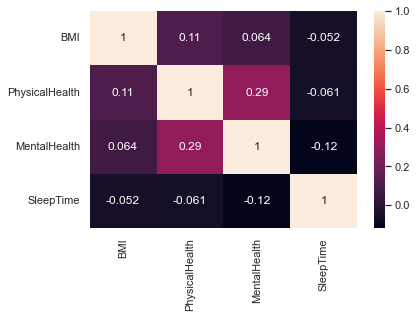

In [9]:
sns.heatmap(numeric_data.iloc[:, 0:].corr(), annot=True)
plt.show()

## 2. Extracting categorical data and doing EDA

In [10]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


In [11]:
categorical_data.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


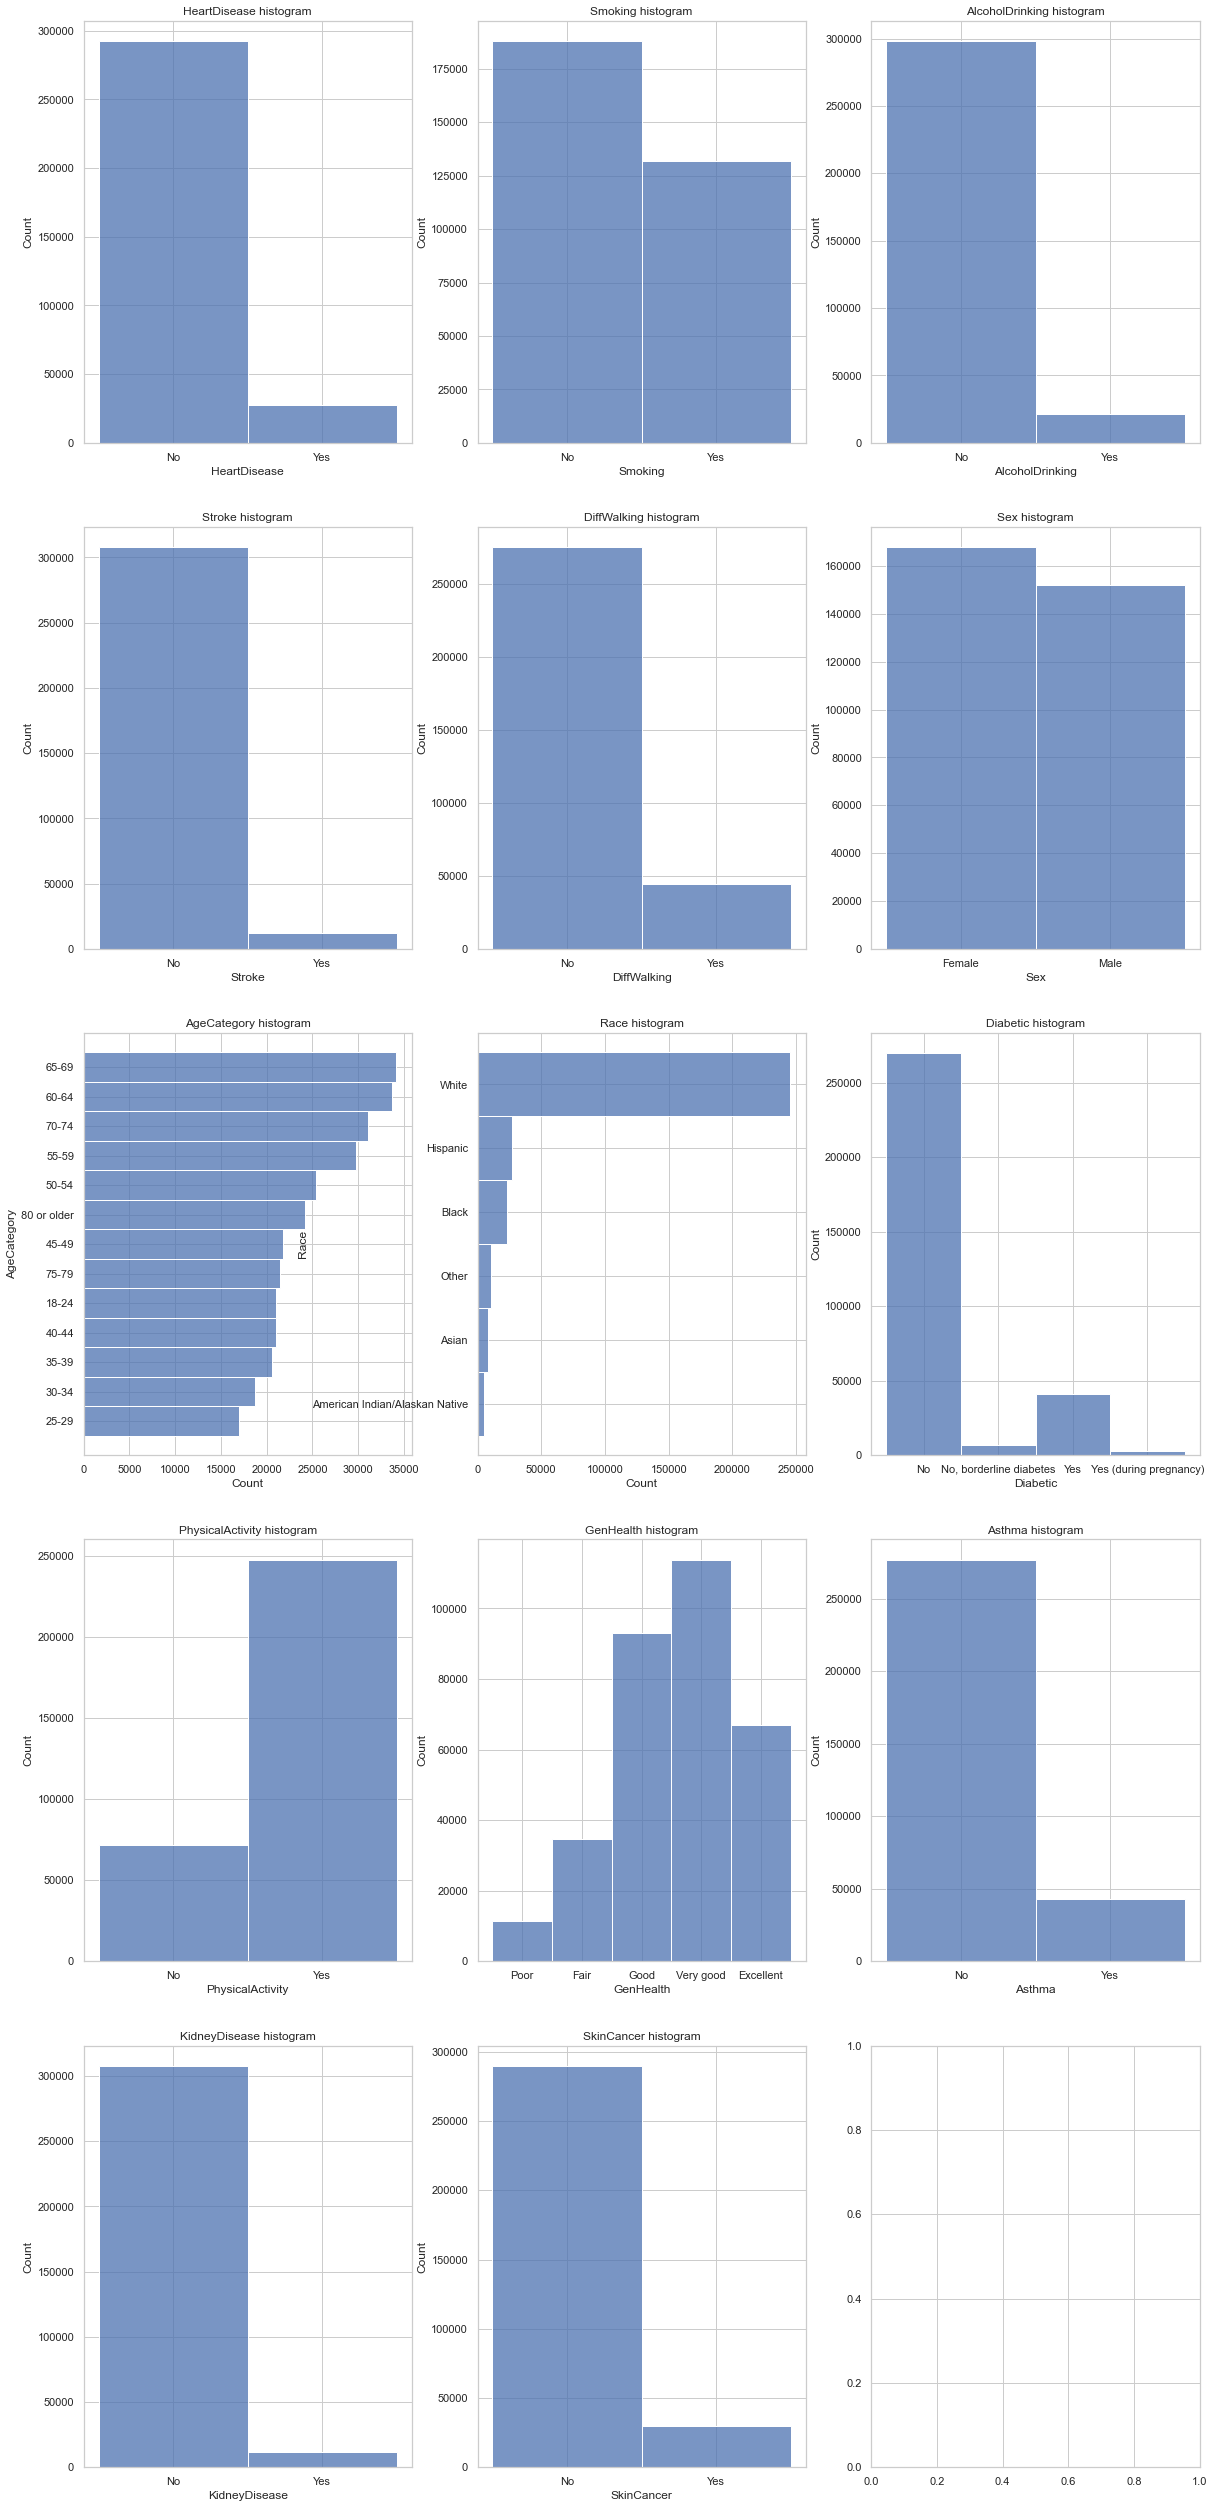

In [12]:
position_index = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2),(3,0),(3,1),(3,2),(4,0),(4,1),(4,2)]
fig,axes = plt.subplots(5,3,figsize=(20,45))

for position, feature in zip(position_index, categorical_data.columns.tolist()[:]):
    if len(categorical_data[feature].unique()) > 15:
        sns.histplot(ax=axes[position],bins = 15, data=categorical_data[feature].sort_values())
    else:
        if feature in ["AgeCategory", "Race"]:
            i, r = pd.factorize(categorical_data[feature])
            a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
            sns.histplot(ax=axes[position],y=categorical_data.iloc[a][feature])
        elif feature == "GenHealth":
            sns.histplot(ax=axes[position],data=pd.Categorical(categorical_data.GenHealth, categories=["Poor","Fair","Good","Very good","Excellent"], ordered=True))
            axes[position].set(xlabel=feature)
        else:
            sns.histplot(ax=axes[position],data=categorical_data[feature].sort_values())
    axes[position].set_title(f'{feature} histogram')

In [26]:
all_maps = {
  'HeartDisease_map' : {'No':0, 'Yes': 1},
  'Smoking_map' : {'No':0, 'Yes': 1},
  'AlcoholDrinking_map' : {'No':0, 'Yes': 1},
  'Stroke_map' : {'No':0, 'Yes': 1},
  'DiffWalking_map' : {'No':0, 'Yes': 1},
  'Sex_map' : {'Female': 0, 'Male': 1},
  'Asthma_map' : {'No':0, 'Yes': 1},
  'KidneyDisease_map' : {'No':0, 'Yes': 1},
  'SkinCancer_map' : {'No':0, 'Yes': 1},
  'PhysicalActivity_map' : {'No':0, 'Yes': 1},
  
  'AgeCategory_map' : {'18-24':0 , '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, 
                    '45-49': 5, '50-54': 6,'55-59': 7, '60-64': 8, '65-69': 9, 
                    '70-74': 10, '75-79': 11, '80 or older': 12},
  'Race_map' : {'White': 0, 'Black': 1, 'Asian': 2, 
              'American Indian/Alaskan Native': 3, 'Hispanic': 4, 'Other': 5},
  'Diabetic_map' : {'No':0, 'No, borderline diabetes': 1, 'Yes (during pregnancy)': 2,
                    'Yes': 3},
  'GenHealth_map' : {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
  
}                 

reverse_map = { column: {j:i for i,j in val.items()} for column, val in all_maps.items()}

In [30]:
def encode_data(data: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    data_copy = data.copy()
    columns = data.columns.to_list()
    for column in columns:
        data_copy[column] = data[column].replace(all_maps[column+'_map'])
    return data_copy

def decode_data(data):
    data_copy = data.copy()
    columns =  data.columns.to_list()
    for column in columns:
        data_copy[column] = data[column].replace(reverse_map[column+'_map'])
        
    return data_copy

In [15]:
df_encoded = encode_data(categorical_data.iloc[:, 1:])

In [16]:
df_encoded = df_encoded.join(categorical_data['HeartDisease'])

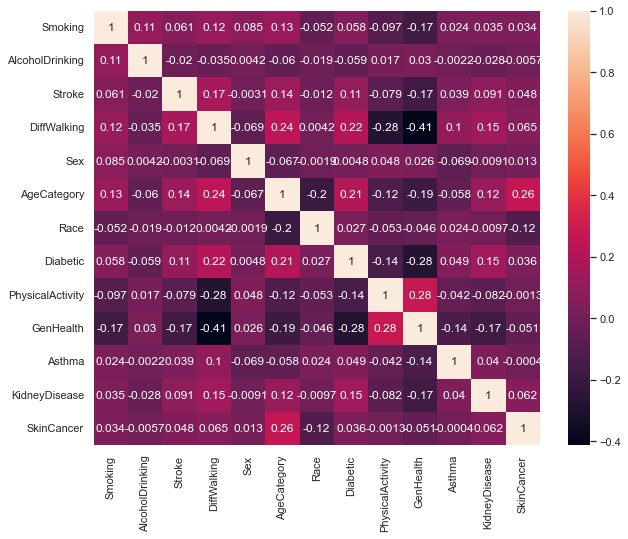

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

In [18]:
def plot_kde(feature):
    figure, axis = plt.subplots(1, 1, figsize=(15, 5))
    sns.histplot(data=categorical_data, x=feature, hue="HeartDisease", multiple="dodge", shrink=.8, hue_order = ['Yes', 'No'])
    plt.title(f'{feature} with Heart Disease')
    
    plt.show()

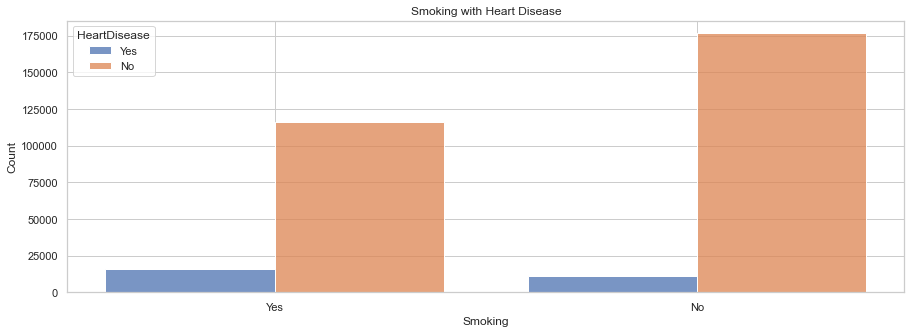

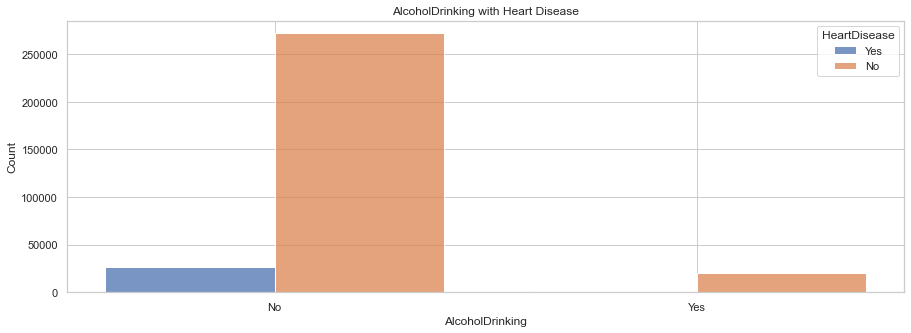

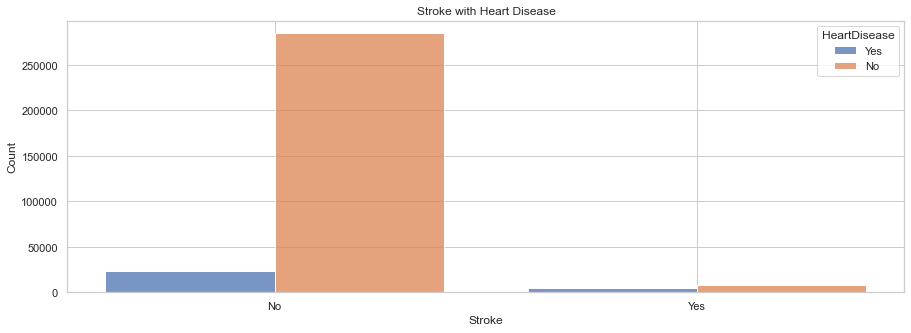

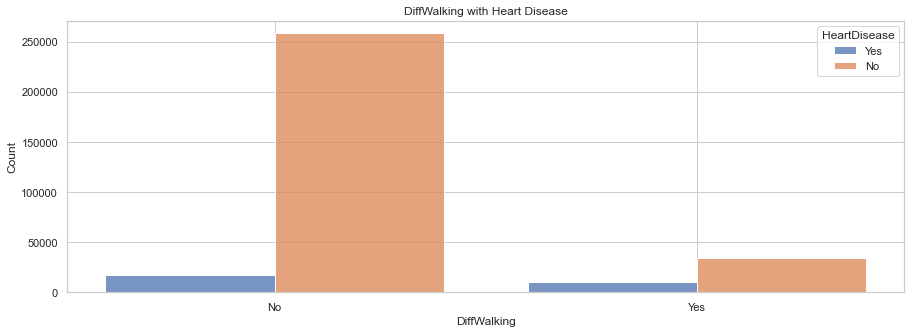

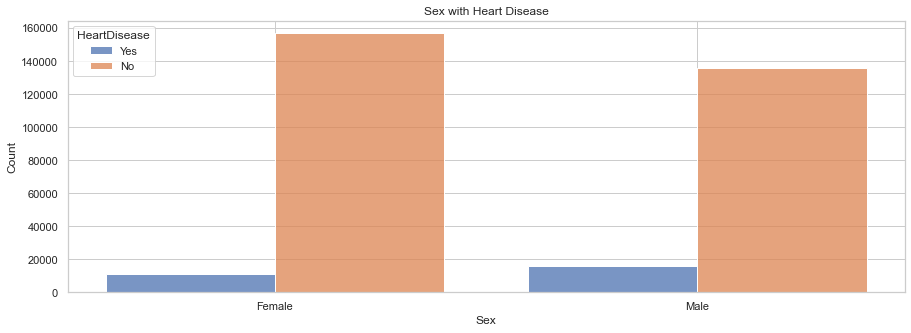

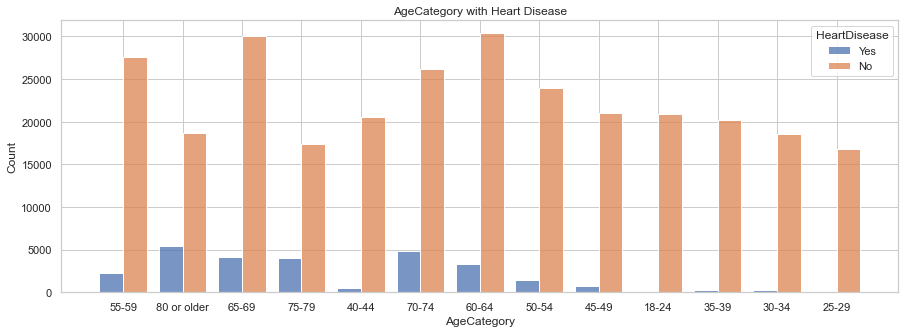

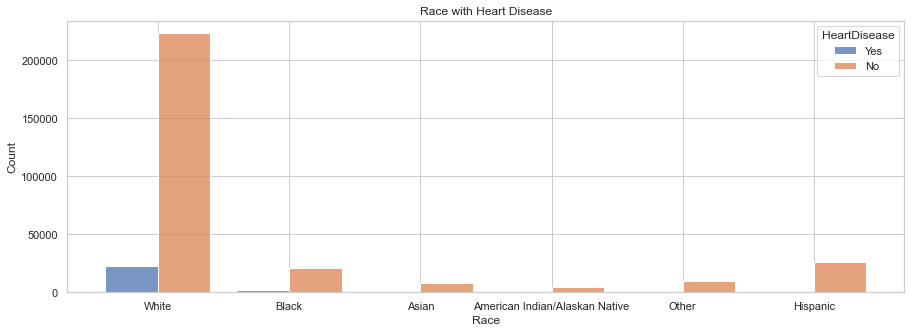

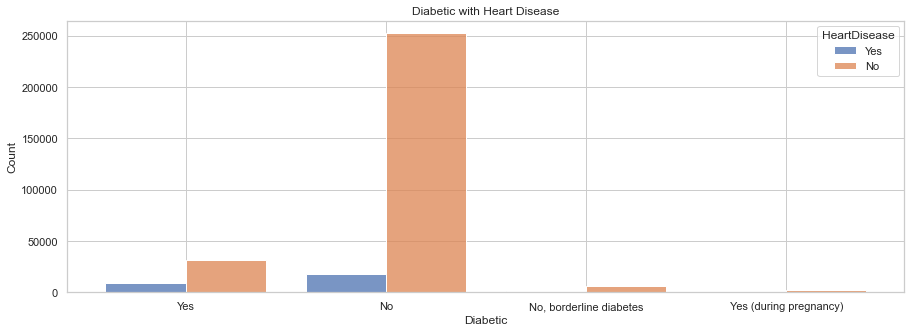

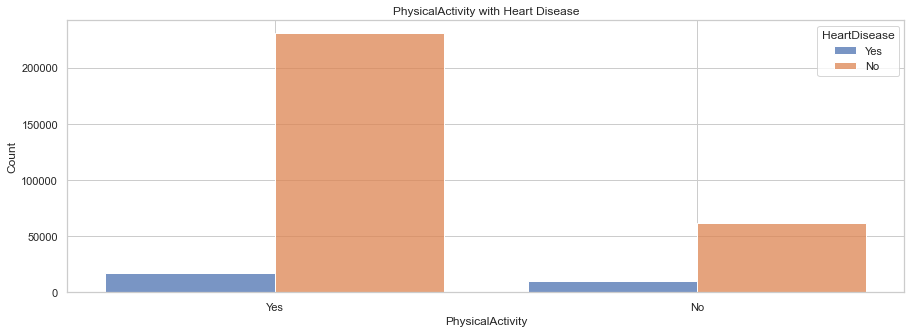

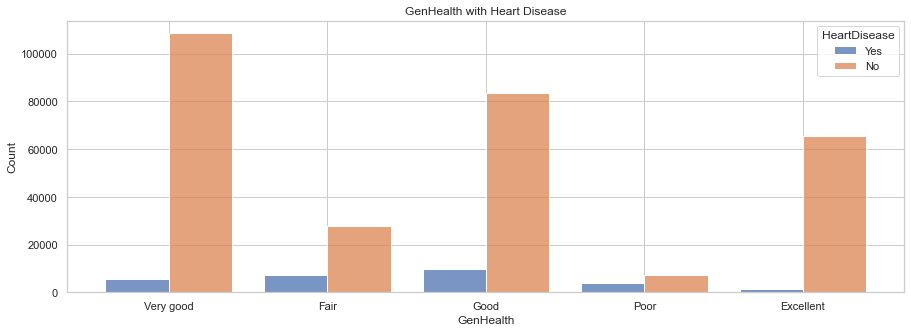

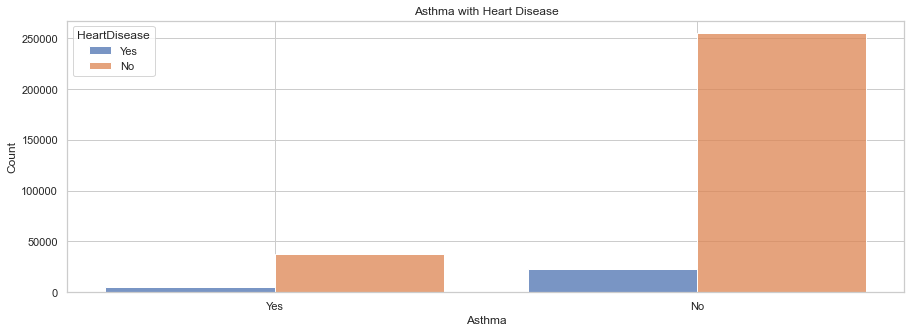

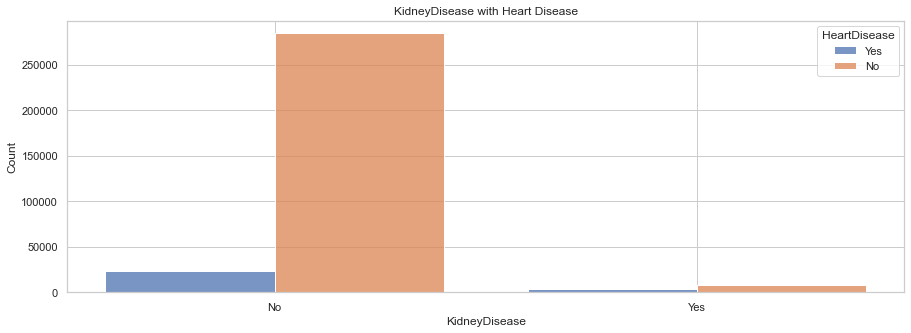

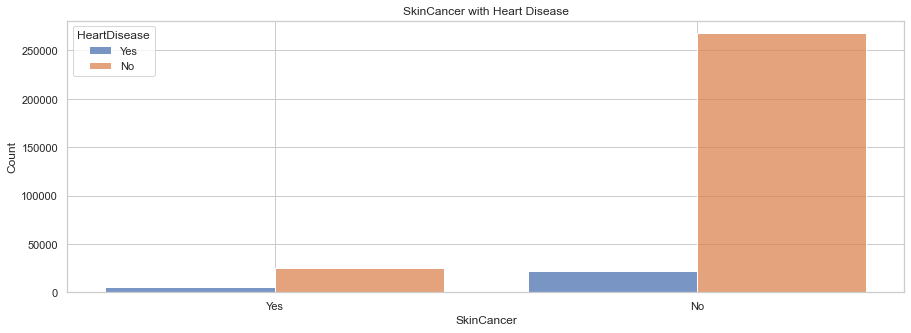

In [19]:
for feature in categorical_data.iloc[:, 1:]:
    plot_kde(feature)

## 3. Trying to balance the imbalanced data

In [35]:
data_copy = numeric_data.iloc[:, :-1].join(df_encoded)
data_copy.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-1.844750,-0.046751,3.281069,-1.460354,1,0,0,0,0,7,0,3,1,3,1,0,1,No
1,-1.256338,-0.424070,-0.490039,-0.067601,0,0,1,0,0,12,0,0,1,3,0,0,0,No
2,-0.274603,2.091388,3.281069,0.628776,1,0,0,0,1,9,0,3,1,1,1,0,0,No
3,-0.647473,-0.424070,-0.490039,-0.763977,0,0,0,0,0,11,0,0,0,2,0,0,1,No
4,-0.726138,3.097572,-0.490039,0.628776,0,0,0,1,0,4,0,0,1,3,0,0,0,No


In [36]:
smote = SMOTE()
X,y = smote.fit_resample(data_copy.iloc[:, :-1], data_copy.iloc[:, -1])
data_oversampled = X.join(y)
data_oversampled.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-1.844750,-0.046751,3.281069,-1.460354,1,0,0,0,0,7,0,3,1,3,1,0,1,No
1,-1.256338,-0.424070,-0.490039,-0.067601,0,0,1,0,0,12,0,0,1,3,0,0,0,No
2,-0.274603,2.091388,3.281069,0.628776,1,0,0,0,1,9,0,3,1,1,1,0,0,No
3,-0.647473,-0.424070,-0.490039,-0.763977,0,0,0,0,0,11,0,0,0,2,0,0,1,No
4,-0.726138,3.097572,-0.490039,0.628776,0,0,0,1,0,4,0,0,1,3,0,0,0,No


In [37]:
data_oversampled[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']] = scaler.inverse_transform(data_oversampled[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])

In [38]:
data_oversampled.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Smoking',
       'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease'],
      dtype='object')

In [39]:
data_oversampled[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer']]

,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,0,0,0,7,0,3,1,3,1,0,1
1,0,1,0,0,12,0,0,1,3,0,0,0
2,0,0,0,1,9,0,3,1,1,1,0,0
3,0,0,0,0,11,0,0,0,2,0,0,1
4,0,0,1,0,4,0,0,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
584839,0,1,1,1,12,0,3,0,1,0,0,1
584840,0,0,0,1,7,0,0,1,2,0,0,0
584841,0,0,0,0,11,0,0,1,2,0,0,0
584842,0,0,0,1,9,0,0,1,2,0,0,0


In [40]:
data_oversampled[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer']] = decode_data(data_oversampled[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer']])

In [41]:
data_oversampled.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,3.0,30.0,5.0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes,No
1,20.34,0.0,0.0,7.0,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No,No
2,26.58,20.0,30.0,8.0,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No,No
3,24.21,0.0,0.0,6.0,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes,No
4,23.71,28.0,0.0,8.0,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No,No


In [42]:
data_oversampled.to_csv('heart_2020_oversampled.csv', index=False)

In [23]:
before_sampling = list(Counter(data_copy['HeartDisease']).items())
after_sampling = list(Counter(data_oversampled['HeartDisease']).items())

In [24]:
print("Before Oversampling \t %s: %d, %s: %d" %(before_sampling[0][0], before_sampling[0][1], before_sampling[1][0], before_sampling[1][1]))
print("After Oversampling \t %s: %d, %s: %d" %(after_sampling[0][0], after_sampling[0][1], after_sampling[1][0], after_sampling[1][1]))

Before Oversampling 	 No: 292422, Yes: 27373
After Oversampling 	 No: 292422, Yes: 292422


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_copy.iloc[:, :-1], data_copy.iloc[:, -1])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_oversampled.iloc[:, :-1], data_oversampled.iloc[:, -1])

In [28]:
from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier()
clf2 = MLPClassifier()

clf1.fit(X_train_1, y_train_1)
clf2.fit(X_train_2, y_train_2)

pred1 = clf1.predict(X_test_1)
pred2 = clf2.predict(X_test_2)

print("Accuracy 1:", accuracy_score(y_test_1, pred1))
print("Accuracy 2:", accuracy_score(y_test_2, pred2))

print("Confusion 1:", confusion_matrix(y_test_1, pred1))
print("Confusion 2:", confusion_matrix(y_test_2, pred2))

C:\Users\vdoddipa\Miniconda3\envs\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy 1: 0.9164717507410974
Accuracy 2: 0.7839355452052171
Confusion 1: [[72751   388]
 [ 6290   520]]
Confusion 2: [[56759 16541]
 [15050 57861]]


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer, Concatenate, Lambda
try:
    from tensorflow.keras.layers import Normalization
except ImportError:
    from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall

In [28]:
numeric_data = data._get_numeric_data()
df_raw = numeric_data.join(df_encoded.iloc[:, :-1])
df_raw.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,16.60,3.0,30.0,5.0,1,0,0,0,0,7,0,3,1,3,1,0,1
1,20.34,0.0,0.0,7.0,0,0,1,0,0,12,0,0,1,3,0,0,0
2,26.58,20.0,30.0,8.0,1,0,0,0,1,9,0,3,1,1,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,11,0,0,0,2,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,1,0,4,0,0,1,3,0,0,0


In [46]:
class PreProcessing(Layer):
    def __init__(self, mean, var, maps, **kwargs):
        super(PreProcessing, self).__init__(**kwargs)
        
        self.scaler_layer = Normalization(mean=mean, variance=var)
        self.maps = maps
    
    def mapping_input(self, data):
        pass
    
    def call(self, input_layer: Layer):
        # input_layer = tf.convert_to_tensor(input_layer)
        scaler_input = Lambda(lambda x: x[:, :4])(input_layer)
        categorical_input = Lambda(lambda x:x[:, 4:])(input_layer)
        scaled_input = self.scaler_layer(scaler_input)
        # print(scaled_input.shape)
        # print(categorical_input.shape)
        
        # categorized_input = input_layer[4:]
        # return scaled_input
        return Concatenate()([scaled_input, categorical_input])
        

In [38]:
x = df_raw.iloc[0:2]

In [45]:
x

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,16.60,3.0,30.0,5.0,1,0,0,0,0,7,0,3,1,3,1,0,1
1,20.34,0.0,0.0,7.0,0,0,1,0,0,12,0,0,1,3,0,0,0


In [47]:
preprocessing_layer = PreProcessing(mean = scaler.mean_, var = scaler.var_, maps = all_maps)


input_layer = Input(shape=(17,))
out_layer = preprocessing_layer(input_layer)
model = Model(input_layer, out_layer)
model.predict(x)

array([[-1.8447504 , -0.04675106,  3.2810686 , -1.4603535 ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  7.        ,
         0.        ,  3.        ,  1.        ,  3.        ,  1.        ,
         0.        ,  1.        ],
       [-1.2563384 , -0.4240698 , -0.49003857, -0.06760041,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        , 12.        ,
         0.        ,  0.        ,  1.        ,  3.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [42]:
model.predict(x)

array([[-1.8447504 , -0.04675106,  3.2810686 , -1.4603535 ],
       [-1.2563384 , -0.4240698 , -0.49003857, -0.06760041]],
      dtype=float32)

In [32]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [159]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_2.shape[1], )))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy', Precision(), Recall()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               4608      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [160]:
history = model.fit(X_train_2, y_train_2.replace(all_maps['HeartDisease_map']), epochs=100, verbose=1, batch_size=64, validation_data=(X_test_2, y_test_2.replace(all_maps['HeartDisease_map'])))

Epoch 1/100
6854/6854 [==============================] - 43s 6ms/step - loss: 0.4897 - Accuracy: 0.7667 - precision_1: 0.7456 - recall_1: 0.8093 - val_loss: 0.4828 - val_Accuracy: 0.7699 - val_precision_1: 0.7448 - val_recall_1: 0.8216
Epoch 2/100
6854/6854 [==============================] - 42s 6ms/step - loss: 0.4805 - Accuracy: 0.7731 - precision_1: 0.7538 - recall_1: 0.8108 - val_loss: 0.4801 - val_Accuracy: 0.7739 - val_precision_1: 0.7630 - val_recall_1: 0.7950
Epoch 3/100
6854/6854 [==============================] - 42s 6ms/step - loss: 0.4755 - Accuracy: 0.7754 - precision_1: 0.7555 - recall_1: 0.8141 - val_loss: 0.4761 - val_Accuracy: 0.7732 - val_precision_1: 0.7356 - val_recall_1: 0.8533
Epoch 4/100
6854/6854 [==============================] - 42s 6ms/step - loss: 0.4707 - Accuracy: 0.7780 - precision_1: 0.7573 - recall_1: 0.8181 - val_loss: 0.4713 - val_Accuracy: 0.7783 - val_precision_1: 0.7604 - val_recall_1: 0.8129
Epoch 5/100
6854/6854 [==============================] -

In [162]:
import pickle

pickle.dump(scaler, open('scaler.pkl','wb'))
model.save('heartModel')
model.save('weights.h5')

INFO:tensorflow:Assets written to: heartModel/assets


In [113]:
!tar -zhcf heartModel.tar.gz heartModel
!tar -zhcf heartModelWeights.tar.gz weights.h5
!tar -zhcf scaler.tar.gz scaler.pkl

In [114]:
!pip install ibm_watson_machine_learning --upgrade
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "NYNAwOBjNJ-NYGxFBqt9g5wy00B3LFeO05QM7knU1Gmz"
}

client = APIClient(wml_credentials)

In [115]:
def guide_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name']== space_name)['metadata']['id'])

In [116]:
space_uid = guide_from_space_name(client, 'tensorflowModel')
print('Space UID:', space_uid)

Space UID: f6d73f2e-a744-4358-8162-129f9eebc405


In [117]:
client.set.default_space(space_uid)

'SUCCESS'

In [58]:
client.software_specifications.list()

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9               12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn

In [118]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9-horovod")
software_spec_uid

'dda170cc-ca67-5da7-9b7a-cf84c6987fae'

In [119]:
software_spec_uid_2 = client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
software_spec_uid_2

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [70]:
model_details = client.repository.store_model(model='heartModel.tar.gz', meta_props={
    client.repository.ModelMetaNames.NAME: "Heart_model",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)
model_id

'62898150-f84e-4a50-a1ee-5f9d26150822'

In [100]:
model_weight_details = client.repository.store_model(model='heartModelWeights.tar.gz', meta_props={
    client.repository.ModelMetaNames.NAME: "Heart_model_weight",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_weights_id = client.repository.get_model_id(model_weight_details)
model_weights_id

'edcf61e3-0db9-41ae-a93e-480b7982135f'

In [120]:
scikit_model_details = client.repository.store_model(model='scaler.tar.gz', meta_props={
    client.repository.ModelMetaNames.NAME: "scaler",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid_2
})

model_id_2 = client.repository.get_model_id(scikit_model_details)
model_id_2

'c6974477-36bc-4dfd-93bc-188a3dacfd4b'

In [71]:
client.repository.download(model_id, "my_model.tar.gz")

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [90]:
sample_model = tf.keras.models.load_model('heartModel')

In [102]:
from pickle import load

In [103]:
!dir

heartModel	   heartModelWeights.tar.gz  scaler.pkl
heartModel.tar.gz  my_model.tar.gz	     weights.h5


In [110]:
sample = load(open('scaler.pkl','rb'), encoding='bytes')

In [108]:
import pickle
pickle.__version__

AttributeError: module 'pickle' has no attribute '__version__'

In [129]:
scaler.feature_names_in_

array(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype=object)